In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

# Import Dataset

In [2]:
xls_path = pd.ExcelFile('/Users/dileepsathyan/Documents/GitHub/Assignments/Vroom Virtusa/Analytics_Dataset.xlsx')
df_car_sales   = pd.read_excel(xls_path, 'car_sales')
df_car_details = pd.read_excel(xls_path, 'car_details')
df_car_claims  = pd.read_excel(xls_path, 'car_claims')

In [3]:
df_car_sales.head()

,car_id_sales,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31
2,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaN
3,7008763171,DE,NaN,2021-06-07,2021-23,2021-06-08,21100,1,NaN
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09


In [4]:
df_car_details.head()

,car_id_details,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
0,5096178328,1,1,0,1039,1141,1049,0,1100,3534.0
1,1879501444,0,1,1,1039,1138,1049,0,0,3534.0
2,8375508078,1,1,1,1039,1139,0,0,0,1606.0
3,1266330246,0,1,0,1040,1139,1050,0,0,3534.0
4,9079520882,0,0,0,1039,1141,0,0,1100,3534.0


In [5]:
df_car_claims.head()

,car_id_claims,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,7525691980,NaN,0,0,NaN,NaN
1,8543168465,C1AG79687,0,1,620.140528,CLOSED_FULLY_PROCESSED
2,7308726237,NaN,0,0,NaN,NaN
3,9070724843,NaN,0,0,NaN,NaN
4,6274074693,NaN,0,0,NaN,NaN


# Data Cleaning

## 1. Car_Sales Dataframe Cleaning

In [6]:
df_car_sales.shape

(70512, 9)

In [7]:
df_car_sales.drop_duplicates(inplace=True)
df_car_sales.shape

(69618, 9)

In [8]:
# Delete the transport dates for the rows with transport_to_merchant == 0

df_car_sales['transport_date'].loc[(df_car_sales['transport_to_merchant'])== 0] = np.NaN
df_car_sales

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,car_id_sales,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31
2,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaN
3,7008763171,DE,NaN,2021-06-07,2021-23,2021-06-08,21100,1,NaN
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09
...,...,...,...,...,...,...,...,...,...
70507,8375003179,FR,NaN,2021-06-09,2021-23,2021-06-10,1533,0,NaN
70508,1788160938,BE,NaN,2021-07-05,2021-27,2021-07-19,3470,1,2021-07-22
70509,2990209110,FR,7489998.0,2021-03-02,2021-09,2021-03-03,4503,1,2021-03-12
70510,7825830294,DE,NaN,2021-04-10,2021-14,2021-04-13,1424,0,NaN


#### Convert to right datatypes

In [9]:
# df_car_sales['car_id_sales'] = df_car_sales['car_id_sales'].astype('str')
# df_car_sales['merchant_id'] = df_car_sales['merchant_id'].astype('str')

df_car_sales['selling_date'] = pd.to_datetime(df_car_sales['selling_date'])
df_car_sales['payment_date'] = pd.to_datetime(df_car_sales['payment_date'])
df_car_sales['transport_date'] = pd.to_datetime(df_car_sales['transport_date'])

# Rename primary column
df_car_sales.rename(columns={'car_id_sales': 'car_id'}, inplace=True)

df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69618 entries, 0 to 70511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69618 non-null  int64         
 1   country                69618 non-null  object        
 2   merchant_id            19088 non-null  float64       
 3   selling_date           69618 non-null  datetime64[ns]
 4   selling_week           69618 non-null  object        
 5   payment_date           69618 non-null  datetime64[ns]
 6   sell_price             69618 non-null  int64         
 7   transport_to_merchant  69618 non-null  int64         
 8   transport_date         32625 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 5.3+ MB


In [10]:
# Notice that the same car_ids are repeated for different merchant_ids

df_car_sales[df_car_sales['car_id'] == 5805619905]

,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
24388,5805619905,BE,16191229.0,2021-07-31,2021-30,2021-08-03,22596,1,2021-08-04
46739,5805619905,BE,14307587.0,2021-07-31,2021-30,2021-08-03,22596,1,2021-08-04


In [11]:
# There are merchant_ids who bought so many cars.

df_car_sales.merchant_id.value_counts()

8819318.0     823
5482442.0      97
2593085.0      92
6717821.0      64
2491964.0      62
             ... 
3451474.0       1
6902952.0       1
5854417.0       1
6903110.0       1
10485917.0      1
Name: merchant_id, Length: 9102, dtype: int64

In [12]:
#### As long as we have no clarity on the correct Merchant who bought a car, it doesnt matter which record we delete.
#### Lets keep car_id only once and delete all following records for the sale.

df_car_sales = df_car_sales.drop_duplicates(subset='car_id', keep="first")
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 70511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69551 non-null  int64         
 1   country                69551 non-null  object        
 2   merchant_id            19021 non-null  float64       
 3   selling_date           69551 non-null  datetime64[ns]
 4   selling_week           69551 non-null  object        
 5   payment_date           69551 non-null  datetime64[ns]
 6   sell_price             69551 non-null  int64         
 7   transport_to_merchant  69551 non-null  int64         
 8   transport_date         32597 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 5.3+ MB


### Handle missing datapoints in Car_Sales

In [13]:
# For each country, find the average days for transport from the payment_date

df_cs_temp = df_car_sales[df_car_sales['transport_date'].notna()]
df_cs_temp['days_payment_to_transp'] = (df_cs_temp['transport_date'] - df_cs_temp['payment_date']).dt.days
df_cs_temp

<ipython-input-13-5aa5afa4b28e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_temp['days_payment_to_transp'] = (df_cs_temp['transport_date'] - df_cs_temp['payment_date']).dt.days


,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date,days_payment_to_transp
0,3421775349,ES,NaN,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31,17
1,5316743932,DE,NaN,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31,14
4,1417558732,DE,NaN,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09,7
5,3033323046,DE,12108955.0,2021-03-06,2021-09,2021-03-19,983,1,2021-03-30,11
8,2342272309,DE,NaN,2021-06-30,2021-26,2021-07-01,24336,1,2021-07-13,12
...,...,...,...,...,...,...,...,...,...,...
70493,5405810520,DE,NaN,2021-06-22,2021-25,2021-06-23,9000,1,2021-07-16,23
70497,2271497015,DE,NaN,2021-02-16,2021-07,2021-02-17,11889,1,2021-03-01,12
70499,7493564941,SE,2567469.0,2021-08-16,2021-33,2021-08-18,5266,1,2021-08-19,1
70508,1788160938,BE,NaN,2021-07-05,2021-27,2021-07-19,3470,1,2021-07-22,3


In [14]:
avr_days_to_transp = df_cs_temp.groupby(['country'])['days_payment_to_transp'].mean().round()
avr_days_to_transp= avr_days_to_transp.to_dict()
avr_days_to_transp

{'AT': 10.0,
 'BE': 11.0,
 'DE': 11.0,
 'DK': 8.0,
 'ES': 7.0,
 'FI': 16.0,
 'FR': 12.0,
 'IT': 14.0,
 'NL': 21.0,
 'PL': 22.0,
 'PT': 6.0,
 'SE': 8.0}

In [15]:
# Subset the cars trasp_to_merchant to fill the missing transport_date for them.

df_cs_transp = df_car_sales[df_car_sales['transport_to_merchant']==1]
df_cs_transp['days_to_transp'] = pd.to_timedelta(df_cs_transp['country'].map(avr_days_to_transp), 'days')
df_cs_transp['transport_date'] = df_cs_transp['transport_date'].fillna(df_cs_transp['payment_date'] + df_cs_transp['days_to_transp'])
df_cs_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35172 entries, 0 to 70509
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   car_id                 35172 non-null  int64          
 1   country                35172 non-null  object         
 2   merchant_id            8782 non-null   float64        
 3   selling_date           35172 non-null  datetime64[ns] 
 4   selling_week           35172 non-null  object         
 5   payment_date           35172 non-null  datetime64[ns] 
 6   sell_price             35172 non-null  int64          
 7   transport_to_merchant  35172 non-null  int64          
 8   transport_date         35172 non-null  datetime64[ns] 
 9   days_to_transp         35172 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2), timedelta64[ns](1)
memory usage: 3.0+ MB


<ipython-input-15-00d41aa0048b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_transp['days_to_transp'] = pd.to_timedelta(df_cs_transp['country'].map(avr_days_to_transp), 'days')
<ipython-input-15-00d41aa0048b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_transp['transport_date'] = df_cs_transp['transport_date'].fillna(df_cs_transp['payment_date'] + df_cs_transp['days_to_transp'])


In [16]:
df_cs_transp = df_cs_transp.drop(columns=['days_to_transp'])
df_cs_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35172 entries, 0 to 70509
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 35172 non-null  int64         
 1   country                35172 non-null  object        
 2   merchant_id            8782 non-null   float64       
 3   selling_date           35172 non-null  datetime64[ns]
 4   selling_week           35172 non-null  object        
 5   payment_date           35172 non-null  datetime64[ns]
 6   sell_price             35172 non-null  int64         
 7   transport_to_merchant  35172 non-null  int64         
 8   transport_date         35172 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 2.7+ MB


In [17]:
# Replace the non-NULL transport_date to original dataframe

idx = df_cs_transp.index
df_car_sales = df_car_sales.drop(idx)
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34379 entries, 2 to 70511
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 34379 non-null  int64         
 1   country                34379 non-null  object        
 2   merchant_id            10239 non-null  float64       
 3   selling_date           34379 non-null  datetime64[ns]
 4   selling_week           34379 non-null  object        
 5   payment_date           34379 non-null  datetime64[ns]
 6   sell_price             34379 non-null  int64         
 7   transport_to_merchant  34379 non-null  int64         
 8   transport_date         0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 2.6+ MB


In [18]:
# Append the cleaned dataframe to the the original

df_car_sales = df_car_sales.append(df_cs_transp)

# Reset index
df_car_sales.reset_index(drop=True, inplace=True)
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69551 non-null  int64         
 1   country                69551 non-null  object        
 2   merchant_id            19021 non-null  float64       
 3   selling_date           69551 non-null  datetime64[ns]
 4   selling_week           69551 non-null  object        
 5   payment_date           69551 non-null  datetime64[ns]
 6   sell_price             69551 non-null  int64         
 7   transport_to_merchant  69551 non-null  int64         
 8   transport_date         35172 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 4.8+ MB


## Car_Details Dataframe Cleaning

In [19]:
df_car_details.shape

(70512, 10)

In [20]:
df_car_details.drop_duplicates(inplace=True)
df_car_details.shape

(70034, 10)

In [21]:
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70034 entries, 0 to 70511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id_details     70034 non-null  int64  
 1   has_tuning         70034 non-null  int64  
 2   has_airbags        70034 non-null  int64  
 3   has_alarm_system   70034 non-null  int64  
 4   fuel_type          70034 non-null  int64  
 5   gear_type          70034 non-null  int64  
 6   ac_type            70034 non-null  int64  
 7   xenon_light        70034 non-null  int64  
 8   navigation_system  70034 non-null  int64  
 9   radio_system       43494 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.9 MB


#### Convert to right datatypes

In [22]:
# df_car_details['car_id_details'] = df_car_details['car_id_details'].astype('str')

# Rename primary column
df_car_details.rename(columns={'car_id_details': 'car_id'}, inplace=True)
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70034 entries, 0 to 70511
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             70034 non-null  int64  
 1   has_tuning         70034 non-null  int64  
 2   has_airbags        70034 non-null  int64  
 3   has_alarm_system   70034 non-null  int64  
 4   fuel_type          70034 non-null  int64  
 5   gear_type          70034 non-null  int64  
 6   ac_type            70034 non-null  int64  
 7   xenon_light        70034 non-null  int64  
 8   navigation_system  70034 non-null  int64  
 9   radio_system       43494 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.9 MB


In [23]:
## Check for duplicate records of same car_id

df_car_details[df_car_details.groupby('car_id')['car_id'].transform('size') > 1].sort_values(by='car_id').head(20)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
49297,1021854212,0,0,0,1039,1141,0,0,1100,3534.0
25281,1021854212,0,0,0,1040,1141,0,0,1100,3534.0
19591,1071192762,1,1,1,1040,1139,1050,1089,1100,3534.0
37616,1071192762,1,1,1,1039,1139,1050,1089,1100,3534.0
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
50603,1130791238,1,1,0,1039,1141,1050,0,1100,1100.0
12934,1130791238,1,1,0,1040,1141,1050,0,1100,1100.0


In [24]:
# Subset the records with duplicate car_ids

df_cd_dup = df_car_details[df_car_details.groupby('car_id')['car_id'].transform('size') > 1].sort_values(by='car_id')
df_cd_dup.sort_values(by='car_id').head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
49297,1021854212,0,0,0,1039,1141,0,0,1100,3534.0
25281,1021854212,0,0,0,1040,1141,0,0,1100,3534.0
19591,1071192762,1,1,1,1040,1139,1050,1089,1100,3534.0
37616,1071192762,1,1,1,1039,1139,1050,1089,1100,3534.0
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
50603,1130791238,1,1,0,1039,1141,1050,0,1100,1100.0
12934,1130791238,1,1,0,1040,1141,1050,0,1100,1100.0


In [25]:
df_cd_dup.shape

(961, 10)

In [26]:
# Remove the duplicated car_ids from original dataframe to make it a deduplicated df.

df_cd_deduped = df_car_details.drop(df_cd_dup.index)
df_cd_deduped.shape

(69073, 10)

##### Notice from the above subset that fule_type and navigation_system are the 2 fields which cause duplication.

###### 1. Those who differ only by fuel_type, lets keep the first record of each car_id and delete the rest.

In [27]:
df_cd_dup = df_cd_dup.drop_duplicates(['car_id', 'navigation_system']).sort_values(by='car_id')

df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
49297,1021854212,0,0,0,1039,1141,0,0,1100,3534.0
19591,1071192762,1,1,1,1040,1139,1050,1089,1100,3534.0
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
50603,1130791238,1,1,0,1039,1141,1050,0,1100,1100.0
11699,1131021388,1,1,0,1039,1138,1050,0,0,3534.0
24110,1134904596,0,0,0,1040,1141,0,0,0,3534.0
48854,1175003748,1,1,0,1040,1138,1050,0,1100,1100.0


In [28]:
df_cd_dup.shape

(792, 10)

In [29]:
# Filter the uniques and append to the deduped dataframe & drop the uniques from the df_cd_dup

df_temp = df_cd_dup[df_cd_dup.groupby('car_id')['car_id'].transform('size') == 1]

df_cd_deduped = df_cd_deduped.append(df_temp)
df_cd_dup = df_cd_dup.drop(df_temp.index)
df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
62249,1092285954,1,1,0,1039,1138,1050,0,0,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
54450,1189899240,0,0,0,1039,1141,0,0,0,3534.0
11135,1189899240,0,0,0,1040,1141,0,0,1100,3534.0
52138,1251496465,1,1,1,1039,1139,1050,1089,0,3534.0
67790,1251496465,1,1,1,1039,1139,1050,1089,1100,3534.0
8106,1257596002,0,0,0,1039,1141,0,0,0,3534.0
67243,1257596002,0,0,0,1039,1141,0,0,1100,3534.0


In [30]:
df_cd_dup.shape

(628, 10)

##### 2. Those who differ only by navigation_system, lets keep the first record of each car_id and delete the rest.

In [31]:
df_cd_dup = df_cd_dup.drop_duplicates(['car_id', 'fuel_type']).sort_values(by='car_id')

df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
20260,1092285954,1,1,0,1039,1138,1050,0,1100,NaN
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
54450,1189899240,0,0,0,1039,1141,0,0,0,3534.0
11135,1189899240,0,0,0,1040,1141,0,0,1100,3534.0
52138,1251496465,1,1,1,1039,1139,1050,1089,0,3534.0
8106,1257596002,0,0,0,1039,1141,0,0,0,3534.0
69446,1257782013,1,1,0,1039,1138,0,0,0,NaN
29230,1257782013,1,1,0,1040,1138,0,0,1100,NaN
54861,1266182032,0,0,0,1039,1141,0,0,1100,3534.0


In [32]:
# Filter the uniques and append to the deduped dataframe & drop the uniques from the df_cd_dup

df_temp = df_cd_dup[df_cd_dup.groupby('car_id')['car_id'].transform('size') == 1]

df_cd_deduped = df_cd_deduped.append(df_temp)
df_cd_dup = df_cd_dup.drop(df_temp.index)
df_cd_dup.head(10)

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
23369,1116277714,1,1,0,1039,1138,0,0,0,3534.0
62436,1116277714,1,1,0,1040,1138,0,0,1100,3534.0
54450,1189899240,0,0,0,1039,1141,0,0,0,3534.0
11135,1189899240,0,0,0,1040,1141,0,0,1100,3534.0
69446,1257782013,1,1,0,1039,1138,0,0,0,NaN
29230,1257782013,1,1,0,1040,1138,0,0,1100,NaN
64274,1550589125,0,0,0,1039,1141,0,0,0,3534.0
2198,1550589125,0,0,0,1040,1141,0,0,1100,3534.0
47017,1675413187,0,0,0,1039,1141,0,0,0,3534.0
47934,1675413187,0,0,0,1040,1141,0,0,1100,3534.0


In [33]:
df_cd_dup.shape

(134, 10)

###### 3. Those who differ in both navigation_system & fuel_type, lets keep the record with 1100 as nav_system and delete the 0 values.

In [34]:
df_cd_dup = df_cd_dup[df_cd_dup['navigation_system'] != 0]
df_cd_deduped = df_cd_deduped.append(df_cd_dup)
df_cd_deduped.shape

(69551, 10)

In [35]:
df_car_details = df_cd_deduped

# Reset index
df_car_details.reset_index(drop=True, inplace=True)

df_car_details.shape

(69551, 10)

### Handle Missing datapoints in Car_Details

In [36]:
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             69551 non-null  int64  
 1   has_tuning         69551 non-null  int64  
 2   has_airbags        69551 non-null  int64  
 3   has_alarm_system   69551 non-null  int64  
 4   fuel_type          69551 non-null  int64  
 5   gear_type          69551 non-null  int64  
 6   ac_type            69551 non-null  int64  
 7   xenon_light        69551 non-null  int64  
 8   navigation_system  69551 non-null  int64  
 9   radio_system       43151 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.3 MB


In [37]:
# Notice that radio_system doesnt have any major correlation with the other fields in the dataframe
df_car_details.corr()

,car_id,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
car_id,1.000000,0.004624,0.000627,0.000217,-0.000255,-0.001932,0.001381,-0.001102,0.001106,-0.000920
has_tuning,0.004624,1.000000,0.295046,0.068079,-0.006797,-0.181562,0.270314,0.096776,0.268147,-0.173203
has_airbags,0.000627,0.295046,1.000000,0.182746,0.028728,-0.621448,0.797482,0.184988,0.134463,-0.316304
has_alarm_system,0.000217,0.068079,0.182746,1.000000,0.006139,-0.058446,0.151926,0.181711,0.103301,-0.043394
fuel_type,-0.000255,-0.006797,0.028728,0.006139,1.000000,-0.079128,0.051082,0.042988,-0.040874,-0.025838
gear_type,-0.001932,-0.181562,-0.621448,-0.058446,-0.079128,1.000000,-0.523276,0.040913,0.091438,0.139118
ac_type,0.001381,0.270314,0.797482,0.151926,0.051082,-0.523276,1.000000,0.202947,0.165723,-0.341344
xenon_light,-0.001102,0.096776,0.184988,0.181711,0.042988,0.040913,0.202947,1.000000,0.275102,-0.202932
navigation_system,0.001106,0.268147,0.134463,0.103301,-0.040874,0.091438,0.165723,0.275102,1.000000,-0.403629
radio_system,-0.000920,-0.173203,-0.316304,-0.043394,-0.025838,0.139118,-0.341344,-0.202932,-0.403629,1.000000


In [38]:
# Hence, fill the missing datapoints in the radio_system with 0 values.

df_car_details['radio_system'].fillna(0, inplace=True)
df_car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_id             69551 non-null  int64  
 1   has_tuning         69551 non-null  int64  
 2   has_airbags        69551 non-null  int64  
 3   has_alarm_system   69551 non-null  int64  
 4   fuel_type          69551 non-null  int64  
 5   gear_type          69551 non-null  int64  
 6   ac_type            69551 non-null  int64  
 7   xenon_light        69551 non-null  int64  
 8   navigation_system  69551 non-null  int64  
 9   radio_system       69551 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 5.3 MB


## Car_Claims Dataframe Cleaning

In [39]:
df_car_claims.shape

(70512, 6)

In [40]:
df_car_claims.drop_duplicates(inplace=True)
df_car_claims.shape

(70504, 6)

In [41]:
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70504 entries, 0 to 70511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id_claims    70504 non-null  int64  
 1   claim_number     19974 non-null  object 
 2   full_refunds     70504 non-null  int64  
 3   partial_refunds  70504 non-null  int64  
 4   voucher_amount   15173 non-null  float64
 5   claim_status     19974 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.8+ MB


#### Convert to right datatypes

In [42]:
# df_car_claims['car_id_claims'] = df_car_claims['car_id_claims'].astype('str')
# df_car_claims['claim_number'] = df_car_claims['claim_number'].astype('str')

# Rename primary column
df_car_claims.rename(columns={'car_id_claims': 'car_id'}, inplace=True)

df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70504 entries, 0 to 70511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           70504 non-null  int64  
 1   claim_number     19974 non-null  object 
 2   full_refunds     70504 non-null  int64  
 3   partial_refunds  70504 non-null  int64  
 4   voucher_amount   15173 non-null  float64
 5   claim_status     19974 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.8+ MB


In [43]:
df_car_claims.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,7525691980,NaN,0,0,NaN,NaN
1,8543168465,C1AG79687,0,1,620.140528,CLOSED_FULLY_PROCESSED
2,7308726237,NaN,0,0,NaN,NaN
3,9070724843,NaN,0,0,NaN,NaN
4,6274074693,NaN,0,0,NaN,NaN


In [44]:
# In case of full_refunds, there cannot be a voucher_amount.
# In other words, if the voucher_amount exists, fix the full_refunds fields values to 0.

idx = df_car_claims[df_car_claims['voucher_amount'].notnull() &
                   (df_car_claims['full_refunds'] == 1) & 
                   (df_car_claims['partial_refunds']== 1)].index

idx

Int64Index([ 3977,  5837,  7572,  7682,  8626,  9419, 11645, 12005, 12717,
            13239, 14913, 17342, 17667, 18612, 20365, 21321, 22204, 23521,
            24947, 25942, 28158, 28711, 30803, 30819, 31675, 31813, 31828,
            33221, 34505, 34681, 39289, 39766, 41513, 42285, 43052, 43709,
            43883, 44702, 44808, 45811, 46930, 49073, 49442, 50475, 51577,
            55796, 57965, 58991, 60969, 61978, 62810, 63861, 66466, 68141,
            69005],
           dtype='int64')

In [45]:
# Adjusting the full_refunds values to 0 to perfect the dataframe

df_car_claims['full_refunds'][idx] = 0
df_car_claims.loc[idx].head()

<ipython-input-45-7adf4c928e34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_claims['full_refunds'][idx] = 0


,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
3977,3252585712,C1YP17288,0,1,5744.003952,CLOSED_FULLY_PROCESSED
5837,8767210209,C2VN02471,0,1,668.721766,CLOSED_FULLY_PROCESSED
7572,5138342450,C1FH72285,0,1,440.810000,CLOSED_WAITING_FOR_MONEY_TO_BE_SHIPPED_AND_COM...
7682,4167620373,C1HV98906,0,1,642.250289,CLOSED_FULLY_PROCESSED
8626,3849154773,C2MK47916,0,1,1908.542760,CLOSED_FULLY_PROCESSED


In [46]:
df_car_claims[df_car_claims['voucher_amount'].isnull() &
             (df_car_claims['claim_status'] == 'CLOSED_NO_COMPENSATION')].sum()

car_id                                                 3532417518184
claim_number       C2PK03886C1KR99635C1VF59664C1UP31245C2SW26283C...
full_refunds                                                     634
partial_refunds                                                    0
voucher_amount                                                     0
claim_status       CLOSED_NO_COMPENSATIONCLOSED_NO_COMPENSATIONCL...
dtype: object

In [47]:
# # For the REJECTED & CLOSED_NO_COMPENSATION statuses, set the full_refunds & partial refunds values to 0

# idx = df_car_claims[df_car_claims['claim_status'].isin(['REJECTED', 'CLOSED_NO_COMPENSATION'])].index
# idx

In [48]:
# # Adjusting the full_refunds values to 0 to perfect the dataframe

# df_car_claims['full_refunds'][idx] = 0
# df_car_claims['partial_refunds'][idx] = 0
# df_car_claims.loc[idx].head()

In [49]:
df_car_claims['claim_status'].value_counts()

CLOSED_FULLY_PROCESSED                                                    7910
REJECTED                                                                  5026
CLOSED_NO_COMPENSATION                                                    3410
CREATED                                                                   1262
CLOSED_ITEMS_FOUND_AND_SENT                                                783
CLOSED_WAITING_FOR_MORE_PROOF                                              348
PROOF_NOT_RECEIVED                                                         309
WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT                           234
WAITING_FOR_LOCAL_OPS_MD_DECISION                                          159
MISSING_ITEMS_IN_PROGRESS                                                  134
2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT                   77
NEW                                                                         72
WAITING_FOR_CLAIMS_TEAM_2_EVALUATION                

In [50]:
status_codes = { np.NaN: 0,
                'CREATED': 1,
                'NEW_MISSING_ITEM_CLAIM': 1,
                'NEW': 1,

                'PROOF_NOT_RECEIVED': 2,
                'CLOSED_WAITING_FOR_MORE_PROOF': 3,
                'CLOSED_OVER_TIME_LIMIT': 4,
                'MORE_PROOF_RECEIVED': 5,
                'WAITING_FOR_CLAIMS_TEAM_1_EVALUATION': 6,
                '2ND_EVALUATION_CLAIMS_TEAM_2': 7,
                'WAITING_FOR_CLAIMS_TEAM_2_EVALUATION': 8,
                'WAITING_FOR_CARRIER_FEEDBACK': 9,
                'WAITING_FOR_LEGAL_TEAM': 10,

                'CLOSED_NO_COMPENSATION': 11,
                'REJECTED': 12,

                'MISSING_ITEMS_IN_PROGRESS': 13,
                'CLOSED_ITEMS_FOUND_AND_SENT': 14,

                'WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT': 15,
                '2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT': 16,
                'WAITING_FOR_LOCAL_OPS_MD_DECISION': 17,
                '2ND_DECISION_WAITING_FOR_LOCAL_OPS_MD_DECISION': 18,

                'CLOSED_CARRIER_WILL_COMPENSATE': 19,

                'CLOSED_WAITING_FOR_MERCHANT_BANK_DETAILS': 20, 
                'CLOSED_WAITING_FOR_CAR_DOCUMENTS_AND_BANK_DETAILS': 21,
                'WAITING_FOR_BANK_DETAILS_VALIDATION': 22,

                'CLOSED_WAITING_FOR_MONEY_TO_BE_SHIPPED_AND_COMPENSATION_TO_BE_RECORDED': 23,
                'CLOSED_WAITING_FOR_COMPENSATION_TO_BE_RECORDED': 24,
                'CLOSED_WAITING_FOR_DOCUMENTS': 25,
                'CLOSED_FULLY_PROCESSED': 26 }

In [51]:
df_cc = df_car_claims.copy()
df_cc['status_code'] = df_cc['claim_status'].map(status_codes)
# df_cc = df_cc.sort_values(by=['car_id', 'status_code'])
df_cc.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
0,7525691980,NaN,0,0,NaN,NaN,0
1,8543168465,C1AG79687,0,1,620.140528,CLOSED_FULLY_PROCESSED,26
2,7308726237,NaN,0,0,NaN,NaN,0
3,9070724843,NaN,0,0,NaN,NaN,0
4,6274074693,NaN,0,0,NaN,NaN,0


In [52]:
# df_cc.groupby(['car_id'])['status_code'].max()

idx = df_cc.groupby(['car_id'])['status_code'].transform(max) == df_cc['status_code']
df_cc = df_cc[idx]
df_cc.shape

(69640, 7)

In [53]:
# Identifying Pending Duplicates in the df

df_cc[df_cc['car_id']== 5149303881]

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
10787,5149303881,C4TK46454,0,1,3112.880206,CLOSED_FULLY_PROCESSED,26
19814,5149303881,C4TK46454,1,0,NaN,CLOSED_FULLY_PROCESSED,26


In [54]:
df_cc['car_id'].nunique()

69551

In [55]:
# Subset the records with duplicate car_ids

df_cc_dup = df_cc[df_cc.groupby('car_id')['car_id'].transform('size') > 1].sort_values(by='car_id')
df_cc_dup.head(10)

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
65138,1091480557,C1ZJ20861,0,1,3826.101648,CLOSED_FULLY_PROCESSED,26
4190,1091480557,C1ZJ20861,1,0,NaN,CLOSED_FULLY_PROCESSED,26
37116,1266182032,C1SS06287,0,1,2804.535297,CLOSED_FULLY_PROCESSED,26
6935,1266182032,C1SS06287,0,1,2149.457901,CLOSED_FULLY_PROCESSED,26
29497,1329241519,C2GR87979,0,1,705.036285,CLOSED_FULLY_PROCESSED,26
44485,1329241519,C2GR87979,0,1,482.114221,CLOSED_FULLY_PROCESSED,26
42278,1356214392,C1KB80609,0,1,2797.550353,REJECTED,12
25037,1356214392,C1KB80609,0,1,2337.572390,REJECTED,12
68046,1370035853,C2KX69437,0,1,1074.665772,CLOSED_FULLY_PROCESSED,26
31235,1370035853,C2KX69437,0,1,1394.864155,CLOSED_FULLY_PROCESSED,26


In [56]:
df_cc_dup.shape

(177, 7)

In [57]:
# Remove the duplicated car_ids from original dataframe to make it a deduplicated df.

df_cc_deduped = df_cc.drop(df_cc_dup.index)
df_cc_deduped.shape

(69463, 7)

In [58]:
df_cc_dup['car_id'].nunique()

88

In [59]:
df_cc_deduped['car_id'].nunique()

69463

##### Noticed that there are duplicate records with same claim_status
##### 1. Lets keep the record with voucher_amount for the duplicated records.

In [60]:
df_cd_dup.shape

(67, 10)

In [61]:
# 1a. Before deleting the rows with NULL voucher_amount, 
#     make sure that no duplicated car_ids have NULL values in both of the rows

df_cc_dup[df_cc_dup['voucher_amount'].isnull()]['car_id'].value_counts()

2802433468    2
9320910782    1
2818110547    1
2612408606    1
3855907037    1
7363990747    1
5036405350    1
4191587287    1
7151950304    1
8813163856    1
4427773773    1
3539094478    1
3842127670    1
4922195103    1
5149303881    1
7348849733    1
4065361055    1
4309735904    1
6974366625    1
4566417827    1
7613645214    1
5570835365    1
3096043603    1
5239366824    1
5755284393    1
4197008170    1
7096519625    1
1951678892    1
1091480557    1
9565824175    1
3157164086    1
1993742522    1
4998841339    1
9336612599    1
Name: car_id, dtype: int64

In [62]:
df_cc_dup[df_cc_dup['car_id']== 2802433468]

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
60052,2802433468,C1CJ23334,0,0,NaN,CREATED,1
10175,2802433468,C1CJ23334,0,0,NaN,NEW,1


In [63]:
# Since there exists 1 record which has NULL values in both of its rows, 
# lets first clean it to take 1 row and append to the deduped dataframe.

df_cc_deduped = df_cc_deduped.append(df_cc_dup.loc[[60052]])
df_cc_deduped.shape

(69464, 7)

In [64]:
# Now drop the both rows of the car_id from dup dataframe.

df_cc_dup = df_cc_dup.drop([60052, 10175])
df_cc_dup.shape

(175, 7)

In [65]:
df_cc_dup.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
65138,1091480557,C1ZJ20861,0,1,3826.101648,CLOSED_FULLY_PROCESSED,26
4190,1091480557,C1ZJ20861,1,0,NaN,CLOSED_FULLY_PROCESSED,26
37116,1266182032,C1SS06287,0,1,2804.535297,CLOSED_FULLY_PROCESSED,26
6935,1266182032,C1SS06287,0,1,2149.457901,CLOSED_FULLY_PROCESSED,26
29497,1329241519,C2GR87979,0,1,705.036285,CLOSED_FULLY_PROCESSED,26


In [66]:
df_cc_dup.to_excel('df_cc_dup.xlsx')

In [67]:
# 1b. Now go on and delete the rows with NULL values in voucher_amount in the duplicated dataframe.

idx = df_cc_dup[df_cc_dup['voucher_amount'].isnull()].index

df_cc_dup = df_cc_dup.drop(idx)
df_cc_dup.shape

(142, 7)

In [68]:
# Append the unique rows to dedupted dataframe

df_temp = df_cc_dup[df_cc_dup.groupby('car_id')['car_id'].transform('size') == 1]
df_cc_deduped = df_cc_deduped.append(df_temp)

# Drop the deduped df from the duplicate dataframe
df_cc_dup = df_cc_dup.drop(df_temp.index)
df_cc_dup.shape

(109, 7)

In [69]:
df_cc_dup.head()

,car_id,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,status_code
37116,1266182032,C1SS06287,0,1,2804.535297,CLOSED_FULLY_PROCESSED,26
6935,1266182032,C1SS06287,0,1,2149.457901,CLOSED_FULLY_PROCESSED,26
29497,1329241519,C2GR87979,0,1,705.036285,CLOSED_FULLY_PROCESSED,26
44485,1329241519,C2GR87979,0,1,482.114221,CLOSED_FULLY_PROCESSED,26
42278,1356214392,C1KB80609,0,1,2797.550353,REJECTED,12


In [70]:
# 2. Now voucher_amount field contains only valid amounts. Lets keep the rows with max amounts and drop the rest.

idx = df_cc_dup.groupby(['car_id'])['voucher_amount'].transform(max) == df_cc_dup['voucher_amount']
df_cc_dup = df_cc_dup[idx]
df_cc_dup.shape

(54, 7)

In [71]:
# Append all the deduped rows to the 

df_cc_deduped = df_cc_deduped.append(df_cc_dup)
df_car_claims = df_cc_deduped

# Reset index
df_car_claims.reset_index(drop=True, inplace=True)

df_car_claims.shape

(69551, 7)

In [72]:
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           69551 non-null  int64  
 1   claim_number     19021 non-null  object 
 2   full_refunds     69551 non-null  int64  
 3   partial_refunds  69551 non-null  int64  
 4   voucher_amount   14751 non-null  float64
 5   claim_status     19021 non-null  object 
 6   status_code      69551 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 3.7+ MB


### Handle missing datapoints in Car_Claims

In [73]:
# Missing Voucher_Amounts to be filled by 0 values
df_car_claims['voucher_amount'].fillna(0, inplace=True)

# Missing claim_status means there is no claim for the sale. Hence fill in with 'NO_CLAIM_RAISED'
df_car_claims['claim_status'].fillna('NO_CLAIM_RAISED', inplace=True)

# Status_code field is not necessary at this stage. Hence drop the field for now.
df_car_claims.drop('status_code', axis=1, inplace=True)
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69551 entries, 0 to 69550
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           69551 non-null  int64  
 1   claim_number     19021 non-null  object 
 2   full_refunds     69551 non-null  int64  
 3   partial_refunds  69551 non-null  int64  
 4   voucher_amount   69551 non-null  float64
 5   claim_status     69551 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 3.2+ MB


# Combine the dataframes to 1

In [74]:
df_car_sales.shape

(69551, 9)

In [75]:
df_car_details.shape

(69551, 10)

In [76]:
df_car_claims.shape

(69551, 6)

In [77]:
# Merging all the 3 dataframes into 1 master

df_master = df_car_sales.merge(df_car_details, on='car_id').merge(df_car_claims, on='car_id')
df_master.shape

(69551, 23)

In [78]:
df_master.head()

,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date,has_tuning,...,gear_type,ac_type,xenon_light,navigation_system,radio_system,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaT,0,...,1138,1050,0,1100,3534.0,NaN,0,0,0.000000,NO_CLAIM_RAISED
1,9820548955,FR,NaN,2021-08-31,2021-35,2021-09-02,8423,0,NaT,0,...,1138,1050,0,1100,1100.0,NaN,0,0,0.000000,NO_CLAIM_RAISED
2,7062041313,DE,10443420.0,2021-05-14,2021-19,2021-05-17,5800,0,NaT,0,...,1141,0,0,1100,3534.0,C1GW00315,0,1,911.334251,REJECTED
3,2944034946,ES,NaN,2021-07-21,2021-29,2021-07-29,4000,0,NaT,1,...,1138,0,0,0,3534.0,NaN,0,0,0.000000,NO_CLAIM_RAISED
4,9307814133,DE,NaN,2021-02-17,2021-07,2021-02-23,4950,0,NaT,0,...,1141,0,0,0,3534.0,NaN,0,0,0.000000,NO_CLAIM_RAISED


# Data Exploration

In [79]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 69550
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 69551 non-null  int64         
 1   country                69551 non-null  object        
 2   merchant_id            19021 non-null  float64       
 3   selling_date           69551 non-null  datetime64[ns]
 4   selling_week           69551 non-null  object        
 5   payment_date           69551 non-null  datetime64[ns]
 6   sell_price             69551 non-null  int64         
 7   transport_to_merchant  69551 non-null  int64         
 8   transport_date         35172 non-null  datetime64[ns]
 9   has_tuning             69551 non-null  int64         
 10  has_airbags            69551 non-null  int64         
 11  has_alarm_system       69551 non-null  int64         
 12  fuel_type              69551 non-null  int64         
 13  g

In [80]:
df_master.describe()

,car_id,merchant_id,sell_price,transport_to_merchant,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,voucher_amount
count,6.955100e+04,1.902100e+04,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.00000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000,69551.000000
mean,5.482666e+09,8.386137e+06,7456.351828,0.505701,0.386882,0.842748,0.159149,1010.396759,1138.892971,845.42540,173.110149,402.383862,1814.948786,0.028109,0.212089,409.185390
std,2.598456e+09,4.728563e+06,8542.072637,0.499971,0.487040,0.364040,0.365818,171.698535,1.251686,415.52003,398.186022,529.824039,1640.071469,0.165285,0.408790,1278.060098
min,1.000145e+09,1.211960e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.238701e+09,4.294300e+06,2251.500000,0.000000,0.000000,1.000000,0.000000,1039.000000,1138.000000,1049.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.464531e+09,8.674186e+06,4824.000000,1.000000,0.000000,1.000000,0.000000,1040.000000,1138.000000,1050.00000,0.000000,0.000000,1100.000000,0.000000,0.000000,0.000000
75%,7.729173e+09,1.236666e+07,9482.500000,1.000000,1.000000,1.000000,0.000000,1040.000000,1139.000000,1050.00000,0.000000,1100.000000,3534.000000,0.000000,0.000000,0.000000
max,9.999930e+09,1.676935e+07,173000.000000,1.000000,1.000000,1.000000,1.000000,1040.000000,1141.000000,1050.00000,1089.000000,1100.000000,3534.000000,1.000000,1.000000,50331.039294


In [81]:
df_master['claim_status'].value_counts()[1:]

# F: Most of the cases (8013) are either REJECTED or CLOSED_NO_COMP at the end.

CLOSED_FULLY_PROCESSED                                                    7824
REJECTED                                                                  4755
CLOSED_NO_COMPENSATION                                                    3258
CREATED                                                                    895
CLOSED_ITEMS_FOUND_AND_SENT                                                758
CLOSED_WAITING_FOR_MORE_PROOF                                              335
PROOF_NOT_RECEIVED                                                         301
WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT                           226
WAITING_FOR_LOCAL_OPS_MD_DECISION                                          158
MISSING_ITEMS_IN_PROGRESS                                                  131
2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT                   76
NEW                                                                         65
WAITING_FOR_CLAIMS_TEAM_2_EVALUATION                

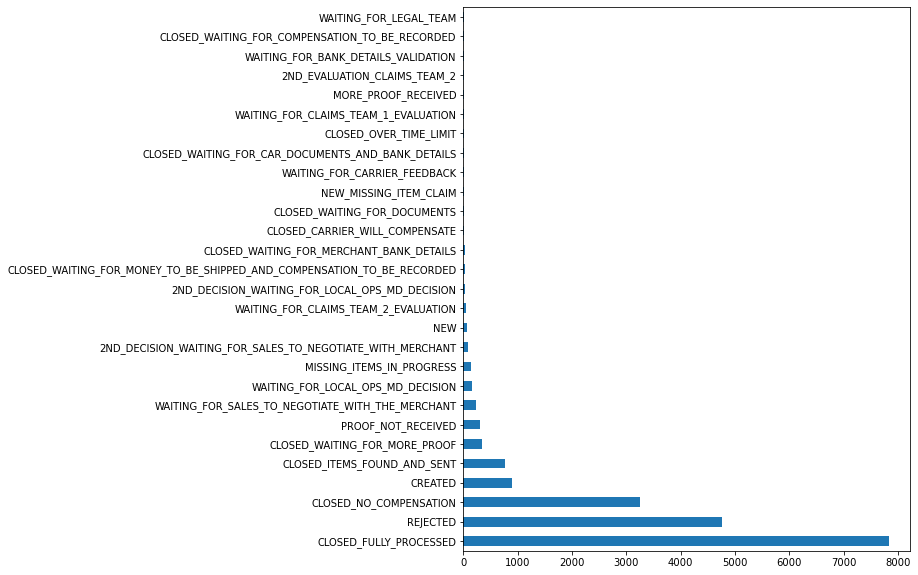

In [82]:
df_master['claim_status'].value_counts()[1:].plot(kind='barh', figsize=(8, 10))

In [83]:
# We need to group the statuses into 4 categories

# 1. NOT_CLAIMED
# 2. REJECTED ( REJECTED / CLOSED_NO_COMP)
# 3. CLAIM_PAID
# 4. IN_PROGRESS

# So there is 1 category where the missing items are sent to customers. 
# Need to understand if it costs anything to Vroom..

df_master[df_master['claim_status']== 'CLOSED_ITEMS_FOUND_AND_SENT']['voucher_amount'].sum()

0.0

In [84]:
df_master[df_master['claim_status']== 'CLOSED_NO_COMPENSATION']['voucher_amount'].sum()

4961354.536353906

In [85]:
# F: When the missing items are found and sent to customer there are no vouchers issues., hence no cost involved.

### Feature Engineering

In [86]:
# Create a new feature: has_claim_raised
# No matter what the result is, if the claim was raised for a sale, flag it 1 else 0.

df_master['has_claim_raised'] = np.where(df_master['claim_number'].isnull(), 0, 1)
df_master[['car_id', 'claim_number', 'has_claim_raised']]

,car_id,claim_number,has_claim_raised
0,5785159431,NaN,0
1,9820548955,NaN,0
2,7062041313,C1GW00315,1
3,2944034946,NaN,0
4,9307814133,NaN,0
...,...,...,...
69546,5405810520,NaN,0
69547,2271497015,NaN,0
69548,7493564941,C1KC93377,1
69549,1788160938,NaN,0


In [87]:
# Create a new feature: refund_amount

# A. In case of full refunds: refund_amount = selling_price of the car
# B. In case of partial_refunds: refund_amount = voucher_amount (condition:REJECTED cases wont get voucher_amount)

def refund_amount(row):
    if row['has_claim_raised'] == 0:
        return 0
    else:
        if row['full_refunds'] == 1:
            return row['sell_price']
        else:
            if row['claim_status'] == 'CLOSED_NO_COMPENSATION':
                return 0
            elif row['claim_status'] == 'REJECTED':
                return row['voucher_amount']
            else:
                return row['voucher_amount']

            
df_master['refund_amount'] = df_master.apply(lambda row: refund_amount(row), axis=1)

In [88]:
df_master[['car_id', 'has_claim_raised', 'full_refunds', 'partial_refunds', 
           'sell_price', 'voucher_amount', 'claim_status', 'refund_amount']].tail(10)

,car_id,has_claim_raised,full_refunds,partial_refunds,sell_price,voucher_amount,claim_status,refund_amount
69541,2925088676,0,0,0,7694,0.000000,NO_CLAIM_RAISED,0.0
69542,1659206731,0,0,0,1550,0.000000,NO_CLAIM_RAISED,0.0
69543,5416683907,0,0,0,9136,0.000000,NO_CLAIM_RAISED,0.0
69544,5421932733,0,0,0,1400,0.000000,NO_CLAIM_RAISED,0.0
69545,9919439196,0,0,0,9487,0.000000,NO_CLAIM_RAISED,0.0
69546,5405810520,0,0,0,9000,0.000000,NO_CLAIM_RAISED,0.0
69547,2271497015,0,0,0,11889,0.000000,NO_CLAIM_RAISED,0.0
69548,7493564941,1,0,1,5266,1381.951724,CLOSED_NO_COMPENSATION,0.0
69549,1788160938,0,0,0,3470,0.000000,NO_CLAIM_RAISED,0.0
69550,2990209110,1,0,0,4503,0.000000,CLOSED_ITEMS_FOUND_AND_SENT,0.0


In [89]:
# Create a new feature: days_to_ship by calculating the datediff between payment_date and transport_date

df_master.insert(9, 'days_to_ship', ((df_master['transport_date'] - df_master['payment_date']).dt.days))
# df_master['days_to_ship'] = pd.to_timedelta(df_master['days_to_ship'], 'days')

df_master[df_master['transport_to_merchant']==1][['car_id', 'transport_date', 'payment_date', 'days_to_ship']]

,car_id,transport_date,payment_date,days_to_ship
34379,3421775349,2021-05-31,2021-05-14,17.0
34380,5316743932,2021-08-31,2021-08-17,14.0
34381,7008763171,2021-06-19,2021-06-08,11.0
34382,1417558732,2021-09-09,2021-09-02,7.0
34383,3033323046,2021-03-30,2021-03-19,11.0
...,...,...,...,...
69546,5405810520,2021-07-16,2021-06-23,23.0
69547,2271497015,2021-03-01,2021-02-17,12.0
69548,7493564941,2021-08-19,2021-08-18,1.0
69549,1788160938,2021-07-22,2021-07-19,3.0


In [90]:
df_master.columns

Index(['car_id', 'country', 'merchant_id', 'selling_date', 'selling_week',
       'payment_date', 'sell_price', 'transport_to_merchant', 'transport_date',
       'days_to_ship', 'has_tuning', 'has_airbags', 'has_alarm_system',
       'fuel_type', 'gear_type', 'ac_type', 'xenon_light', 'navigation_system',
       'radio_system', 'claim_number', 'full_refunds', 'partial_refunds',
       'voucher_amount', 'claim_status', 'has_claim_raised', 'refund_amount'],
      dtype='object')

In [91]:
# Create a new feature: short_status by bucketing all the claim_statuses into simple names

no_comp_status = ['CLOSED_NO_COMPENSATION', 
                  'NEW_MISSING_ITEM_CLAIM',
                  'MISSING_ITEMS_IN_PROGRESS',
                  'CLOSED_ITEMS_FOUND_AND_SENT', 
                  'CLOSED_CARRIER_WILL_COMPENSATE'] 


def short_stat(row):
    if row['claim_status'] == 'NO_CLAIM_RAISED':
        return 'NOT_CLAIMED'
    elif row['claim_status'] == 'REJECTED':
        return 'REJECTED'
    elif row['claim_status'] == 'CLOSED_FULLY_PROCESSED':
        return 'CLAIM_PAID'
    elif row['claim_status'] in (no_comp_status):
        return 'NO_COMPENSATION'
    else:
        return 'UNDER_PROCESS'

            
df_master['short_status'] = df_master.apply(lambda row: short_stat(row), axis=1)
df_master[['claim_status', 'short_status']].head(10)

,claim_status,short_status
0,NO_CLAIM_RAISED,NOT_CLAIMED
1,NO_CLAIM_RAISED,NOT_CLAIMED
2,REJECTED,REJECTED
3,NO_CLAIM_RAISED,NOT_CLAIMED
4,NO_CLAIM_RAISED,NOT_CLAIMED
5,NO_CLAIM_RAISED,NOT_CLAIMED
6,MORE_PROOF_RECEIVED,UNDER_PROCESS
7,NO_CLAIM_RAISED,NOT_CLAIMED
8,NO_CLAIM_RAISED,NOT_CLAIMED
9,CLOSED_FULLY_PROCESSED,CLAIM_PAID


In [92]:
df_master[['claim_status', 'short_status']].head(20)

,claim_status,short_status
0,NO_CLAIM_RAISED,NOT_CLAIMED
1,NO_CLAIM_RAISED,NOT_CLAIMED
2,REJECTED,REJECTED
3,NO_CLAIM_RAISED,NOT_CLAIMED
4,NO_CLAIM_RAISED,NOT_CLAIMED
5,NO_CLAIM_RAISED,NOT_CLAIMED
6,MORE_PROOF_RECEIVED,UNDER_PROCESS
7,NO_CLAIM_RAISED,NOT_CLAIMED
8,NO_CLAIM_RAISED,NOT_CLAIMED
9,CLOSED_FULLY_PROCESSED,CLAIM_PAID


## Waterfall (Amounts and Counts)

In [93]:
df_master.groupby(['short_status'])['refund_amount'].sum().round(2)

short_status
CLAIM_PAID         21545408.39
NOT_CLAIMED               0.00
NO_COMPENSATION     4940275.87
REJECTED           10505318.91
UNDER_PROCESS       3576597.35
Name: refund_amount, dtype: float64

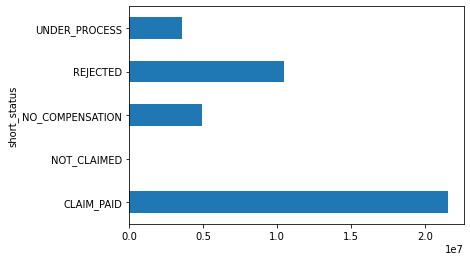

In [94]:
df_master.groupby(['short_status'])['refund_amount'].sum().round(2).plot(kind='barh')

In [95]:
df_master.groupby(['short_status'])['car_id'].count()

short_status
CLAIM_PAID          7824
NOT_CLAIMED        50530
NO_COMPENSATION     4180
REJECTED            4755
UNDER_PROCESS       2262
Name: car_id, dtype: int64

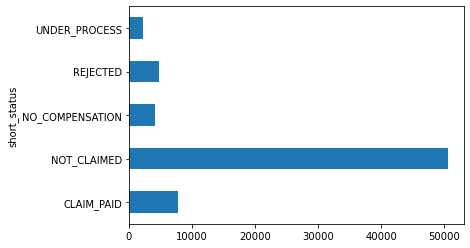

In [96]:
df_master.groupby(['short_status'])['car_id'].count().plot(kind='barh')

## Waterfall based on Country

In [97]:
wf_amt_country = df_master.groupby(['country', 'short_status'])['refund_amount'].sum().round(2).reset_index()
wf_amt_country = wf_amt_country.pivot(index='country', columns='short_status', values='refund_amount')
wf_amt_country = wf_amt_country.fillna(0)
wf_amt_country

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
country,,,,,
AT,1143690.31,0.0,194464.00,283197.00,246677.67
BE,1704852.71,0.0,240470.00,647437.10,202337.13
DE,10627539.10,0.0,2760751.00,4218027.61,1548043.76
DK,51579.70,0.0,7266.00,25928.36,593.09
ES,1853819.16,0.0,420187.00,1441395.19,393015.62
FI,4566.06,0.0,0.00,0.00,7411.70
FR,2695951.22,0.0,487976.00,1594313.05,515014.15
IT,1881247.27,0.0,533110.00,1510408.61,396973.37
LU,1901.56,0.0,0.00,0.00,0.00


In [98]:
wf_cnt_country = df_master.groupby(['country', 'short_status'])['car_id'].count().reset_index()
wf_cnt_country = wf_cnt_country.pivot(index='country', columns='short_status', values='car_id')
wf_cnt_country = wf_cnt_country.fillna(0)
wf_cnt_country

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
country,,,,,
AT,452.0,1836.0,196.0,127.0,173.0
BE,603.0,3117.0,289.0,335.0,144.0
DE,3350.0,21387.0,2242.0,1536.0,834.0
DK,21.0,114.0,3.0,12.0,2.0
ES,756.0,6664.0,316.0,717.0,190.0
FI,1.0,5.0,1.0,0.0,1.0
FR,1249.0,8052.0,463.0,907.0,355.0
IT,770.0,5563.0,367.0,749.0,356.0
LU,1.0,0.0,0.0,0.0,0.0


## Waterfall based on Merchants

In [99]:
# Top 10 Merchants for Claimed Amounts

wf_amt_merch = df_master.groupby(['merchant_id', 'short_status'])['refund_amount'].sum().round(2).reset_index()
wf_amt_merch = wf_amt_merch.pivot(index='merchant_id', columns='short_status', values='refund_amount')
wf_amt_merch = wf_amt_merch.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_amt_merch.head(10)

short_status,CLAIM_PAID,NO_COMPENSATION,REJECTED,UNDER_PROCESS
merchant_id,,,,
6142462.0,281738.95,28398.0,0.00,31507.95
2593085.0,185465.19,0.0,0.00,14436.37
10667222.0,179092.86,10129.0,0.00,0.00
11360764.0,134154.61,0.0,0.00,11907.22
5482442.0,130516.26,12550.0,38217.93,35887.66
703705.0,123567.06,0.0,6761.97,0.00
8819318.0,118640.02,53992.0,1437081.58,33925.88
9575737.0,117460.80,0.0,0.00,5649.03
3260198.0,108248.06,17630.0,0.00,0.00


In [100]:
# Top 10 Merchants for Count of Claims and REJECTIONS

wf_cnt_merch = df_master.groupby(['merchant_id', 'short_status'])['car_id'].count().reset_index()
wf_cnt_merch = wf_cnt_merch.pivot(index='merchant_id', columns='short_status', values='car_id')
wf_cnt_merch = wf_cnt_merch.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_cnt_merch.head(10)

short_status,CLAIM_PAID,NO_COMPENSATION,REJECTED,UNDER_PROCESS
merchant_id,,,,
2593085.0,73.0,9.0,0.0,10.0
8819318.0,69.0,47.0,677.0,30.0
5482442.0,53.0,14.0,16.0,14.0
6717821.0,31.0,32.0,1.0,0.0
10667222.0,28.0,7.0,0.0,0.0
7604076.0,26.0,0.0,4.0,3.0
2491964.0,25.0,18.0,8.0,11.0
6142462.0,24.0,4.0,0.0,4.0
12044106.0,21.0,0.0,1.0,2.0


In [101]:
# F: Merchantid : 8819318 Looks like a player. 
# He has 100% of his purchases (823) out of which 677 (82%) has been rejected & 5.7% was not_comp 
# (which together adds upto 88% fake claims): Big Player!!!

### Waterfall based on Selling_Week

In [102]:
wf_amt_week = df_master.groupby(['selling_week', 'short_status'])['refund_amount'].sum().round(2).reset_index()
wf_amt_week = wf_amt_week.pivot(index='selling_week', columns='short_status', values='refund_amount')
wf_amt_week = wf_amt_week.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_amt_week.head(10)

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
selling_week,,,,,
2021-23,886067.72,0.0,163719.00,408701.70,52948.79
2021-21,880172.58,0.0,131232.00,477672.00,11949.09
2021-20,855802.77,0.0,168690.00,540460.38,86695.30
2021-15,849838.88,0.0,269001.00,381609.59,2432.01
2021-19,803320.01,0.0,260203.87,368272.15,21387.05
2021-28,790318.67,0.0,110935.00,362574.16,170624.59
2021-22,766648.61,0.0,202140.00,323236.44,141054.94
2021-12,745247.44,0.0,114108.00,287142.89,61173.96
2021-33,740589.09,0.0,128278.00,310308.58,379495.24


In [103]:
wf_cnt_week = df_master.groupby(['selling_week', 'short_status'])['car_id'].count().reset_index()
wf_cnt_week = wf_cnt_week.pivot(index='selling_week', columns='short_status', values='car_id')
wf_cnt_week = wf_cnt_week.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_cnt_week.head(10)

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
selling_week,,,,,
2021-20,330.0,1687.0,157.0,197.0,50.0
2021-11,313.0,1467.0,173.0,152.0,51.0
2021-21,309.0,1712.0,137.0,208.0,50.0
2021-23,304.0,1708.0,143.0,185.0,54.0
2021-15,299.0,1468.0,138.0,182.0,38.0
2021-19,291.0,1535.0,152.0,160.0,42.0
2021-16,287.0,1570.0,132.0,175.0,40.0
2021-12,283.0,1453.0,179.0,161.0,37.0
2021-26,280.0,1725.0,137.0,177.0,70.0


### Waterfall based on Sell_Price

In [104]:
df_master['sell_price'].describe()

count     69551.000000
mean       7456.351828
std        8542.072637
min           5.000000
25%        2251.500000
50%        4824.000000
75%        9482.500000
max      173000.000000
Name: sell_price, dtype: float64

In [105]:
# Create an new feature: Price_Bins by bucketing the cars based their sell_prices

bins = [0, 2500, 5000, 20000, 175000]
labels = ['Budget_Cars', 'Medium_Priced_Cars', 'High_Priced_Cars', 'Luxury_Cars']
df_master['price_bins'] = pd.cut(df_master['sell_price'], bins=bins, labels=labels)
df_master[['sell_price', 'price_bins']]

,sell_price,price_bins
0,11028,High_Priced_Cars
1,8423,High_Priced_Cars
2,5800,High_Priced_Cars
3,4000,Medium_Priced_Cars
4,4950,Medium_Priced_Cars
...,...,...
69546,9000,High_Priced_Cars
69547,11889,High_Priced_Cars
69548,5266,High_Priced_Cars
69549,3470,Medium_Priced_Cars


In [106]:
wf_amt_price = df_master.groupby(['price_bins', 'short_status'])['refund_amount'].sum().round(2).reset_index()
wf_amt_price = wf_amt_price.pivot(index='price_bins', columns='short_status', values='refund_amount')
wf_amt_price = wf_amt_price.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_amt_price.head(10)

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
price_bins,,,,,
High_Priced_Cars,11300950.17,0.0,2979233.87,6165567.44,1642214.81
Luxury_Cars,7999933.36,0.0,1280505.00,2573174.55,1542633.69
Medium_Priced_Cars,1800690.92,0.0,492748.00,1406976.35,308477.04
Budget_Cars,443833.93,0.0,187789.00,359600.58,83271.80


In [107]:
wf_cnt_price = df_master.groupby(['price_bins', 'short_status'])['car_id'].count().reset_index()
wf_cnt_price = wf_cnt_price.pivot(index='price_bins', columns='short_status', values='car_id')
wf_cnt_price = wf_cnt_price.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_cnt_price.head(10)

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
price_bins,,,,,
High_Priced_Cars,4155,19501,1992,2289,1058
Medium_Priced_Cars,1779,11746,1027,1282,562
Budget_Cars,1020,16270,773,897,409
Luxury_Cars,870,3013,388,287,233


### Waterfall based on the days_to_ship

In [108]:
df_master['days_to_ship'].describe()

count    35172.000000
mean        11.318606
std         12.531614
min       -352.000000
25%          5.000000
50%          9.000000
75%         14.000000
max        197.000000
Name: days_to_ship, dtype: float64

In [109]:
# Create a new feature: lead_time_bins by bucketing the days_to_ship into weeks

bins = [0, 7, 14, 30, 200]
labels = ['1 Week', '1-2 Weeks', '2-4 Weeks', 'More than 5_Weeks']
df_master['lead_time_bins'] = pd.cut(df_master['days_to_ship'], bins=bins, labels=labels)
df_master[['days_to_ship', 'lead_time_bins']]

,days_to_ship,lead_time_bins
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
69546,23.0,2-4 Weeks
69547,12.0,1-2 Weeks
69548,1.0,1 Week
69549,3.0,1 Week


In [110]:
wf_amt_time = df_master.groupby(['lead_time_bins', 'short_status'])['refund_amount'].sum().round(2).reset_index()
wf_amt_time = wf_amt_time.pivot(index='lead_time_bins', columns='short_status', values='refund_amount')
wf_amt_time = wf_amt_time.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_amt_time.head(10)

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
lead_time_bins,,,,,
1 Week,3583327.20,0.0,1003288.0,1859061.13,467420.69
1-2 Weeks,2297656.69,0.0,424786.0,1854277.49,440845.14
2-4 Weeks,1491058.00,0.0,388146.0,1204715.62,346461.51
More than 5_Weeks,420094.98,0.0,47627.0,270806.66,212011.02


In [111]:
wf_cnt_time = df_master.groupby(['lead_time_bins', 'short_status'])['car_id'].count().reset_index()
wf_cnt_time = wf_cnt_time.pivot(index='lead_time_bins', columns='short_status', values='car_id')
wf_cnt_time = wf_cnt_time.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_cnt_time.head(10)

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
lead_time_bins,,,,,
1 Week,1244,10966,772,1048,419
1-2 Weeks,906,8827,528,798,324
2-4 Weeks,791,4901,432,589,262
More than 5_Weeks,223,1231,125,115,109


In [112]:
# F: Hypothesis is wrong. Cars which got shipped within a week have more claims than the ones which took time.

### Waterfall based on Car_Details / features

In [139]:
wf_cnt_fuel = df_master.groupby(['fuel_type', 'short_status'])['car_id'].count().reset_index()
wf_cnt_fuel = wf_cnt_fuel.pivot(index='fuel_type', columns='short_status', values='car_id')
wf_cnt_fuel = wf_cnt_fuel.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_cnt_fuel

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
fuel_type,,,,,
1039,6214,13758,3349,3765,1769
1040,1340,35516,660,821,407
0,270,1256,171,169,86


In [140]:
wf_cnt_gear = df_master.groupby(['gear_type', 'short_status'])['car_id'].count().reset_index()
wf_cnt_gear = wf_cnt_gear.pivot(index='gear_type', columns='short_status', values='car_id')
wf_cnt_gear = wf_cnt_gear.fillna(0).sort_values(by=['CLAIM_PAID', 'REJECTED'], ascending=False)
wf_cnt_gear

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
gear_type,,,,,
1138,3598,32195,1977,2676,1104
1141,2688,10879,1400,1340,746
1139,1538,7456,803,739,412


In [142]:
wf_cnt_ac = df_master.groupby(['ac_type', 'short_status'])['car_id'].count().reset_index()
wf_cnt_ac = wf_cnt_ac.pivot(index='ac_type', columns='short_status', values='car_id')
wf_cnt_ac = wf_cnt_ac.fillna(0).sort_values(by=['REJECTED'], ascending=False)
wf_cnt_ac

short_status,CLAIM_PAID,NOT_CLAIMED,NO_COMPENSATION,REJECTED,UNDER_PROCESS
ac_type,,,,,
1050,4223,26233,2197,2458,1140
1049,1583,15429,943,1299,514
0,2018,8868,1040,998,608


### Analyse REJECTED claims in detail

In [113]:
df_rej = df_master[df_master['claim_status'] == 'REJECTED']
df_rej.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4755 entries, 2 to 69530
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   car_id                 4755 non-null   int64         
 1   country                4755 non-null   object        
 2   merchant_id            4755 non-null   float64       
 3   selling_date           4755 non-null   datetime64[ns]
 4   selling_week           4755 non-null   object        
 5   payment_date           4755 non-null   datetime64[ns]
 6   sell_price             4755 non-null   int64         
 7   transport_to_merchant  4755 non-null   int64         
 8   transport_date         2572 non-null   datetime64[ns]
 9   days_to_ship           2572 non-null   float64       
 10  has_tuning             4755 non-null   int64         
 11  has_airbags            4755 non-null   int64         
 12  has_alarm_system       4755 non-null   int64         
 13  fu

#### a. REJECTED Vs Country

In [120]:
rej_amt_country = df_rej.groupby(['country'])['refund_amount'].sum().round(2).reset_index()
rej_amt_country = rej_amt_country.sort_values(by='refund_amount', ascending=False)
# rej_amt_country.loc['Total',:]= rej_amt_country.sum(axis=0)
rej_amt_country

,country,refund_amount
2,DE,4218027.61
5,FR,1594313.05
6,IT,1510408.61
4,ES,1441395.19
1,BE,647437.10
10,SE,425780.52
7,NL,311180.15
0,AT,283197.00
9,PT,41635.32
3,DK,25928.36


In [121]:
rej_cnt_country = df_rej.groupby(['country'])['car_id'].count().reset_index()
rej_cnt_country = rej_cnt_country.sort_values(by='car_id', ascending=False)
# rej_cnt_country.loc['Total',:]= rej_cnt_country.sum(axis=0)
rej_cnt_country

,country,car_id
2,DE,1536
5,FR,907
6,IT,749
4,ES,717
1,BE,335
7,NL,185
10,SE,161
0,AT,127
9,PT,24
3,DK,12


#### b. REJECTED Vs Merchants

In [122]:
rej_amt_merch = df_rej.groupby(['merchant_id'])['refund_amount'].sum().round(2).reset_index()
rej_amt_merch = rej_amt_merch.sort_values(by='refund_amount', ascending=False)
# rej_amt_country.loc['Total',:]= rej_amt_country.sum(axis=0)
rej_amt_merch

,merchant_id,refund_amount
1640,8819318.0,1437081.58
1782,9647915.0,110109.00
2727,14563849.0,85500.00
2560,13683897.0,62786.91
1083,5784414.0,61424.35
...,...,...
1053,5593312.0,35.61
976,5151032.0,32.41
2552,13641677.0,31.11
1557,8341564.0,23.73


In [134]:
rej_cnt_merch = df_rej.groupby(['merchant_id'])['car_id'].count().reset_index()
rej_cnt_merch = rej_cnt_merch.sort_values(by='car_id', ascending=False)
# rej_amt_country.loc['Total',:]= rej_amt_country.sum(axis=0)
rej_cnt_merch

,merchant_id,car_id
1640,8819318.0,677
1030,5482442.0,16
979,5178355.0,10
2801,14947430.0,9
1243,6674808.0,9
...,...,...
1418,7481133.0,1
1419,7481743.0,1
335,1850651.0,1
1421,7490946.0,1


#### c. REJECTED Vs Selling_Week

In [124]:
rej_amt_week = df_rej.groupby(['selling_week'])['refund_amount'].sum().round(2).reset_index()
rej_amt_week = rej_amt_week.sort_values(by='refund_amount', ascending=False)
# rej_amt_country.loc['Total',:]= rej_amt_country.sum(axis=0)
rej_amt_week

,selling_week,refund_amount
17,2021-20,540460.38
18,2021-21,477672.00
27,2021-30,462384.32
13,2021-16,455449.07
29,2021-32,431998.16
24,2021-27,412364.11
20,2021-23,408701.70
26,2021-29,387344.06
12,2021-15,381609.59
16,2021-19,368272.15


In [133]:
rej_cnt_week = df_rej.groupby(['selling_week'])['car_id'].count().reset_index()
rej_cnt_week = rej_cnt_week.sort_values(by='car_id', ascending=False)
# rej_amt_country.loc['Total',:]= rej_amt_country.sum(axis=0)
rej_cnt_week

,selling_week,car_id
18,2021-21,208
17,2021-20,197
20,2021-23,185
12,2021-15,182
27,2021-30,181
23,2021-26,177
24,2021-27,176
21,2021-24,176
13,2021-16,175
14,2021-17,174


#### d. REJECTED Vs Sell_Price

In [126]:
rej_amt_price = df_rej.groupby(['price_bins'])['refund_amount'].sum().round(2).reset_index()
rej_amt_price = rej_amt_price.sort_values(by='refund_amount', ascending=False)
rej_amt_price

,price_bins,refund_amount
2,High_Priced_Cars,6165567.44
3,Luxury_Cars,2573174.55
1,Medium_Priced_Cars,1406976.35
0,Budget_Cars,359600.58


In [132]:
rej_cnt_price = df_rej.groupby(['price_bins'])['car_id'].count().reset_index()
rej_cnt_price = rej_cnt_price.sort_values(by='car_id', ascending=False)
rej_cnt_price

,price_bins,car_id
2,High_Priced_Cars,2289
1,Medium_Priced_Cars,1282
0,Budget_Cars,897
3,Luxury_Cars,287


#### e. REJECTED Vs Days_to_Ship

In [129]:
rej_amt_days = df_rej.groupby(['lead_time_bins'])['refund_amount'].sum().round(2).reset_index()
rej_amt_days = rej_amt_days.sort_values(by='refund_amount', ascending=False)
rej_amt_days

,lead_time_bins,refund_amount
0,1 Week,1859061.13
1,1-2 Weeks,1854277.49
2,2-4 Weeks,1204715.62
3,More than 5_Weeks,270806.66


In [131]:
rej_cnt_days = df_rej.groupby(['lead_time_bins'])['car_id'].count().reset_index()
rej_cnt_days = rej_cnt_days.sort_values(by='car_id', ascending=False)
rej_cnt_days

,lead_time_bins,car_id
0,1 Week,1048
1,1-2 Weeks,798
2,2-4 Weeks,589
3,More than 5_Weeks,115


# Predictive Modeling

In [146]:
df_master.head()

,car_id,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date,days_to_ship,...,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status,has_claim_raised,refund_amount,short_status,price_bins,lead_time_bins
0,5785159431,FR,NaN,2021-06-03,2021-22,2021-06-08,11028,0,NaT,NaN,...,NaN,0,0,0.000000,NO_CLAIM_RAISED,0,0.000000,NOT_CLAIMED,High_Priced_Cars,NaN
1,9820548955,FR,NaN,2021-08-31,2021-35,2021-09-02,8423,0,NaT,NaN,...,NaN,0,0,0.000000,NO_CLAIM_RAISED,0,0.000000,NOT_CLAIMED,High_Priced_Cars,NaN
2,7062041313,DE,10443420.0,2021-05-14,2021-19,2021-05-17,5800,0,NaT,NaN,...,C1GW00315,0,1,911.334251,REJECTED,1,911.334251,REJECTED,High_Priced_Cars,NaN
3,2944034946,ES,NaN,2021-07-21,2021-29,2021-07-29,4000,0,NaT,NaN,...,NaN,0,0,0.000000,NO_CLAIM_RAISED,0,0.000000,NOT_CLAIMED,Medium_Priced_Cars,NaN
4,9307814133,DE,NaN,2021-02-17,2021-07,2021-02-23,4950,0,NaT,NaN,...,NaN,0,0,0.000000,NO_CLAIM_RAISED,0,0.000000,NOT_CLAIMED,Medium_Priced_Cars,NaN


In [147]:
df_master.columns

Index(['car_id', 'country', 'merchant_id', 'selling_date', 'selling_week',
       'payment_date', 'sell_price', 'transport_to_merchant', 'transport_date',
       'days_to_ship', 'has_tuning', 'has_airbags', 'has_alarm_system',
       'fuel_type', 'gear_type', 'ac_type', 'xenon_light', 'navigation_system',
       'radio_system', 'claim_number', 'full_refunds', 'partial_refunds',
       'voucher_amount', 'claim_status', 'has_claim_raised', 'refund_amount',
       'short_status', 'price_bins', 'lead_time_bins'],
      dtype='object')

In [259]:
features = ['car_id', 'country', 'merchant_id', 'selling_week', 'transport_to_merchant', 
            'sell_price', 'price_bins', 'days_to_ship', 'has_tuning', 'has_airbags', 'has_alarm_system', 
            'fuel_type', 'gear_type', 'ac_type', 'xenon_light', 'navigation_system', 'radio_system',
            'full_refunds', 'partial_refunds', 'voucher_amount', 'short_status']

df_main = df_master[features]
df_main.head()

,car_id,country,merchant_id,selling_week,transport_to_merchant,sell_price,price_bins,days_to_ship,has_tuning,has_airbags,...,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,voucher_amount,short_status
0,5785159431,FR,NaN,2021-22,0,11028,High_Priced_Cars,NaN,0,1,...,1040,1138,1050,0,1100,3534.0,0,0,0.000000,NOT_CLAIMED
1,9820548955,FR,NaN,2021-35,0,8423,High_Priced_Cars,NaN,0,1,...,1040,1138,1050,0,1100,1100.0,0,0,0.000000,NOT_CLAIMED
2,7062041313,DE,10443420.0,2021-19,0,5800,High_Priced_Cars,NaN,0,0,...,1039,1141,0,0,1100,3534.0,0,1,911.334251,REJECTED
3,2944034946,ES,NaN,2021-29,0,4000,Medium_Priced_Cars,NaN,1,0,...,1039,1138,0,0,0,3534.0,0,0,0.000000,NOT_CLAIMED
4,9307814133,DE,NaN,2021-07,0,4950,Medium_Priced_Cars,NaN,0,0,...,1040,1141,0,0,0,3534.0,0,0,0.000000,NOT_CLAIMED


In [260]:
# Data Manipulation for modeling

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 69550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   car_id                 69551 non-null  int64   
 1   country                69551 non-null  object  
 2   merchant_id            19021 non-null  float64 
 3   selling_week           69551 non-null  object  
 4   transport_to_merchant  69551 non-null  int64   
 5   sell_price             69551 non-null  int64   
 6   price_bins             69551 non-null  category
 7   days_to_ship           35172 non-null  float64 
 8   has_tuning             69551 non-null  int64   
 9   has_airbags            69551 non-null  int64   
 10  has_alarm_system       69551 non-null  int64   
 11  fuel_type              69551 non-null  int64   
 12  gear_type              69551 non-null  int64   
 13  ac_type                69551 non-null  int64   
 14  xenon_light            69551 non-null 

In [261]:
# Handle Missing Values for Merchant_ID and days_to_ship

df_main['merchant_id'].fillna(0, inplace=True)
df_main['days_to_ship'].fillna(0, inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 69550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   car_id                 69551 non-null  int64   
 1   country                69551 non-null  object  
 2   merchant_id            69551 non-null  float64 
 3   selling_week           69551 non-null  object  
 4   transport_to_merchant  69551 non-null  int64   
 5   sell_price             69551 non-null  int64   
 6   price_bins             69551 non-null  category
 7   days_to_ship           69551 non-null  float64 
 8   has_tuning             69551 non-null  int64   
 9   has_airbags            69551 non-null  int64   
 10  has_alarm_system       69551 non-null  int64   
 11  fuel_type              69551 non-null  int64   
 12  gear_type              69551 non-null  int64   
 13  ac_type                69551 non-null  int64   
 14  xenon_light            69551 non-null 

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [262]:
df_main.loc[:,'merchant_id'] = df_main.loc[:,'merchant_id'].astype('str')
df_main.loc[:,'selling_week'] = df_main.loc[:,'selling_week'].astype('str')
df_main.loc[:,'price_bins'] = df_main.loc[:,'price_bins'].astype('str')
df_main.loc[:,'fuel_type'] = df_main.loc[:,'fuel_type'].astype('str')
df_main.loc[:,'gear_type'] = df_main.loc[:,'gear_type'].astype('str')
df_main.loc[:,'ac_type'] = df_main.loc[:,'ac_type'].astype('str')
df_main.loc[:,'xenon_light'] = df_main.loc[:,'xenon_light'].astype('str')
df_main.loc[:,'navigation_system'] = df_main.loc[:,'navigation_system'].astype('str')
df_main.loc[:,'radio_system'] = df_main.loc[:,'radio_system'].astype('str')
df_main.info()

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'pandas.core.frame.DataFrame'>
Int64Index: 69551 entries, 0 to 69550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_id                 69551 non-null  int64  
 1   country                69551 non-null  object 
 2   merchant_id            69551 non-null  object 
 3   selling_week           69551 non-null  object 
 4   transport_to_merchant  69551 non-null  int64  
 5   sell_price             69551 non-null  int64  
 6   price_bins             69551 non-null  object 
 7   days_to_ship           69551 non-null  float64
 8   has_tuning             69551 non-null  int64  
 9   has_airbags            69551 non-null  int64  
 10  has_alarm_system       69551 non-null  int64  
 11  fuel_type              69551 non-null  object 
 12  gear_type              69551 non-null  object 
 13  ac_type                69551 non-null  object 
 14  xenon_light            69551 non-null  object 
 15  na

In [263]:
# Create new dependant variable: is_claim_successful

def final_res(row):
    if row['short_status'] in ['CLAIM_PAID', 'UNDER_PROCESS']:
        return 1
    else:
        return 0

            
df_main['is_claim_successful'] = df_main.apply(lambda row: final_res(row), axis=1)
df_main.head()

<ipython-input-263-403e5819c016>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['is_claim_successful'] = df_main.apply(lambda row: final_res(row), axis=1)


,car_id,country,merchant_id,selling_week,transport_to_merchant,sell_price,price_bins,days_to_ship,has_tuning,has_airbags,...,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,voucher_amount,short_status,is_claim_successful
0,5785159431,FR,0.0,2021-22,0,11028,High_Priced_Cars,0.0,0,1,...,1138,1050,0,1100,3534.0,0,0,0.000000,NOT_CLAIMED,0
1,9820548955,FR,0.0,2021-35,0,8423,High_Priced_Cars,0.0,0,1,...,1138,1050,0,1100,1100.0,0,0,0.000000,NOT_CLAIMED,0
2,7062041313,DE,10443420.0,2021-19,0,5800,High_Priced_Cars,0.0,0,0,...,1141,0,0,1100,3534.0,0,1,911.334251,REJECTED,0
3,2944034946,ES,0.0,2021-29,0,4000,Medium_Priced_Cars,0.0,1,0,...,1138,0,0,0,3534.0,0,0,0.000000,NOT_CLAIMED,0
4,9307814133,DE,0.0,2021-07,0,4950,Medium_Priced_Cars,0.0,0,0,...,1141,0,0,0,3534.0,0,0,0.000000,NOT_CLAIMED,0


In [264]:
df_main.drop(columns=['car_id', 'short_status', 'price_bins'], inplace=True)
df_main.head()

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,country,merchant_id,selling_week,transport_to_merchant,sell_price,days_to_ship,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,voucher_amount,is_claim_successful
0,FR,0.0,2021-22,0,11028,0.0,0,1,1,1040,1138,1050,0,1100,3534.0,0,0,0.000000,0
1,FR,0.0,2021-35,0,8423,0.0,0,1,0,1040,1138,1050,0,1100,1100.0,0,0,0.000000,0
2,DE,10443420.0,2021-19,0,5800,0.0,0,0,0,1039,1141,0,0,1100,3534.0,0,1,911.334251,0
3,ES,0.0,2021-29,0,4000,0.0,1,0,0,1039,1138,0,0,0,3534.0,0,0,0.000000,0
4,DE,0.0,2021-07,0,4950,0.0,0,0,0,1040,1141,0,0,0,3534.0,0,0,0.000000,0


In [265]:
df_main[['is_claim_successful']].sum()

is_claim_successful    10086
dtype: int64

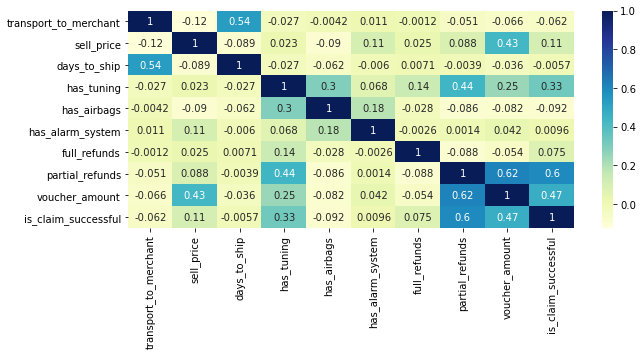

In [266]:
# Plot the heatmap to see the best correlated variables

corr = df_main.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [267]:
df_main.columns

Index(['country', 'merchant_id', 'selling_week', 'transport_to_merchant',
       'sell_price', 'days_to_ship', 'has_tuning', 'has_airbags',
       'has_alarm_system', 'fuel_type', 'gear_type', 'ac_type', 'xenon_light',
       'navigation_system', 'radio_system', 'full_refunds', 'partial_refunds',
       'voucher_amount', 'is_claim_successful'],
      dtype='object')

In [268]:
# Copy the cleaned dataframe for modeling

modeling_features = ['country', 'merchant_id', 'selling_week', 'transport_to_merchant', 
                     'sell_price', 'days_to_ship',
                     'has_tuning', 'has_airbags', 'has_alarm_system', 'fuel_type', 'gear_type', 'ac_type', 
                     'xenon_light', 'navigation_system', 'radio_system', 'full_refunds', 
                     'partial_refunds', 'is_claim_successful']

df_main_cleaned = df_main[modeling_features]
df_main_cleaned.head()

,country,merchant_id,selling_week,transport_to_merchant,sell_price,days_to_ship,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,is_claim_successful
0,FR,0.0,2021-22,0,11028,0.0,0,1,1,1040,1138,1050,0,1100,3534.0,0,0,0
1,FR,0.0,2021-35,0,8423,0.0,0,1,0,1040,1138,1050,0,1100,1100.0,0,0,0
2,DE,10443420.0,2021-19,0,5800,0.0,0,0,0,1039,1141,0,0,1100,3534.0,0,1,0
3,ES,0.0,2021-29,0,4000,0.0,1,0,0,1039,1138,0,0,0,3534.0,0,0,0
4,DE,0.0,2021-07,0,4950,0.0,0,0,0,1040,1141,0,0,0,3534.0,0,0,0


## Label Encoding

In [271]:
from sklearn.preprocessing import LabelEncoder


cols = ['country', 'merchant_id', 'selling_week', 'fuel_type', 'gear_type', 
        'ac_type', 'xenon_light', 'navigation_system', 'radio_system']
le = LabelEncoder()
for col in cols:
    df_main_cleaned[col] = le.fit_transform(df_main_cleaned[col])

df_main_cleaned[cols].head()

<ipython-input-271-88ebd79dbf08>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_cleaned[col] = le.fit_transform(df_main_cleaned[col])


,country,merchant_id,selling_week,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system
0,6,0,19,2,0,2,0,1,5
1,6,0,32,2,0,2,0,1,2
2,2,264,16,1,2,0,0,1,5
3,4,0,26,1,0,0,0,0,5
4,2,0,4,2,2,0,0,0,5


In [272]:
df_main_cleaned.head()

,country,merchant_id,selling_week,transport_to_merchant,sell_price,days_to_ship,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,is_claim_successful
0,6,0,19,0,11028,0.0,0,1,1,2,0,2,0,1,5,0,0,0
1,6,0,32,0,8423,0.0,0,1,0,2,0,2,0,1,2,0,0,0
2,2,264,16,0,5800,0.0,0,0,0,1,2,0,0,1,5,0,1,0
3,4,0,26,0,4000,0.0,1,0,0,1,0,0,0,0,5,0,0,0
4,2,0,4,0,4950,0.0,0,0,0,2,2,0,0,0,5,0,0,0


## Train Test Split

In [273]:
# Specifying the input and output attributes

X = df_main_cleaned.drop(columns=['is_claim_successful'], axis=1)
y = df_main_cleaned['is_claim_successful']

In [274]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

## Model Training

In [279]:
# Classify function
from sklearn.model_selection import cross_val_score


def classify_model(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
    model.fit(X_train, y_train)
    print('Accuracy is: ', model.score(X_test, y_test)*100)

    # Cross validation
    score = cross_val_score(model, X, y, cv=10)
    print('Cross Validation Score: ', np.mean(score)*100)

In [280]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
classify_model(model, X, y)

/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is:  86.03982459923802


/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Cross Validation Score:  85.79028288732007


/Users/dileepsathyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
# DecisionTree Classifier Model
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
classify_model(model, X, y)

Accuracy is:  88.14607145424485
Cross Validation Score:  87.86503146614501


In [282]:
# RandomForest Classifier Model
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
classify_model(model, X, y)

Accuracy is:  89.6772338437208
Cross Validation Score:  88.92325055220262
